In [3]:
import xarray
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt  # plotting library
import matplotlib.patches as mpatches # draw domain boundry patches

# Issue: Maybe downgrade shapely pip install shapely==1.8.5
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature # for coastlines

from pathlib import Path

# Use GRACE data to train

units: kg/m^2

- Ablation if bed topography helps the prediction

Modelling:
- see if year helps
- fine tune on other data


Multiple satellite based methods:
- GRACE: Needs GIA methods Gravitation based
    - 216 months
    - 25 basins: error (er for 25 basins)
- Altimetry based: small GIA adjustment
- (Input-output-models) IOM: 

IMBIE: calibrate models against

In [5]:
# gmb = xarray.open_dataset("data/C3S_GMB_GRACE_vers4.nc")
gmb = xarray.open_dataset("/home/kim/grace_convNP/data/GRACE_COST-G/GRAVIS-3_2002095-2023334_COSTG_0100_AIS_GRID_TUD_0003.nc")

gmb.dm

<xarray.DataArray 'dm' (time: 227, y: 97, x: 117)>
[2576223 values with dtype=float64]
Coordinates:
  * x        (x) float64 -2.9e+06 -2.85e+06 -2.8e+06 ... 2.85e+06 2.9e+06
  * y        (y) float64 -2.4e+06 -2.35e+06 -2.3e+06 ... 2.35e+06 2.4e+06
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10 ... 2023-11-16
Attributes:
    long_name:      change in ice mass
    standard_name:  change_in_land_ice_amount
    units:          kg/m^2
    valid_max:      5002.6
    valid_min:      -8273.7

In [6]:
range = - np.nanmin(gmb.dm) + np.nanmax(gmb.dm)
min = np.nanmin(gmb.dm)
max = np.nanmax(gmb.dm)

zero = 0 - min/range

In [7]:
cvals  = [0., 0.15, 0.3, 0.45, 0.5, 1.]
colors = ["#371229", "#B6222B", "#FF8E35", "#FCDC79", "white", "#62C3DB"]

norm = plt.Normalize(np.min(cvals), np.max(cvals))
tuples = list(zip(map(norm, cvals), colors))
nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

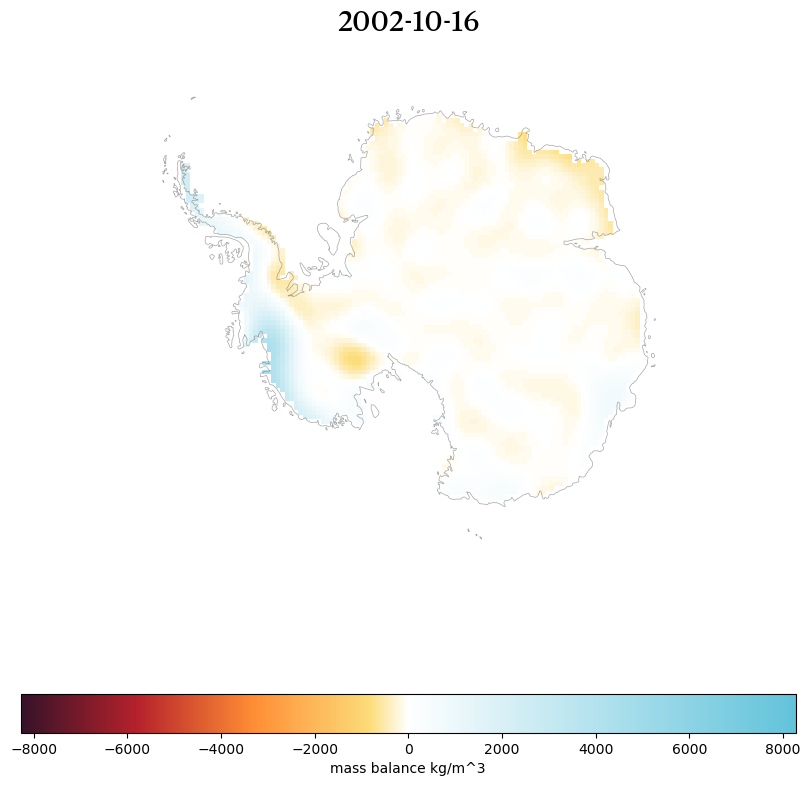

In [8]:
fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection = ccrs.SouthPolarStereo())

# define bounds
ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

# hides boundry line
ax.axis('off')

special_color = 'grey'

# thin coastline lines
ax.add_feature(cfeature.COASTLINE, 
               edgecolor = special_color, 
               linestyle = '-', 
               linewidth = 0.5, 
               alpha = 0.7)

# ax.stock_img()

gmb.dm[4].plot(ax = ax, 
        transform = ccrs.SouthPolarStereo(), 
        vmin = np.nanmin(gmb.dm.values), 
        # define max as negative min to keep 0 white
        vmax = -np.nanmin(gmb.dm.values),
        # cmap = 'bwr_r',
        cmap = nasa_cmap,
        # remove colorbar
        add_colorbar = True,
        cbar_kwargs = dict(orientation = 'horizontal',
                      pad = 0.15, shrink = 1, label = 'mass balance kg/m^3')) 

# specify font
fpath = Path(mpl.get_data_path(), "/home/kim/grace_convNP/fonts/HardingTextWebRegularRegular.ttf")

plt.title(str(gmb.dm[4].time)[36:46], font = fpath, size = 20)

plt.show()

In [17]:
for i in np.arange(0, gmb.dm.shape[0]):

    fig = plt.figure(figsize = [10, 10])
    ax = plt.axes(projection = ccrs.SouthPolarStereo())

    # define bounds
    ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

    # hides boundry line
    ax.axis('off')

    # thin coastline lines
    ax.add_feature(cfeature.COASTLINE, 
                edgecolor = special_color, 
                linestyle = '-', 
                linewidth = 0.5, 
                alpha = 0.7)

    gmb.dm[i].plot(ax = ax, 
            transform = ccrs.SouthPolarStereo(), 
            vmin = np.nanmin(gmb.dm.values), 
            # define max as negative min to keep 0 white
            vmax = -np.nanmin(gmb.dm.values),
            cmap = 'bwr_r',
            # remove colorbar
            add_colorbar = False) 

    # specify font
    fpath = Path(mpl.get_data_path(), "/home/kim/grace_convNP/fonts/HardingTextWebRegularRegular.ttf")

    plt.title(str(gmb.dm[i].time)[36:46], font = fpath, size = 20)

    plt.savefig(r'/home/kim/grace_convNP/gif_images/'+ 'image' + str(i)+'.jpg')

    # clear current figure
    plt.clf()

    # plt.show()

/tmp/ipykernel_1392328/1007693310.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = [10, 10])


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [19]:
import PIL

image_frames = [] # creating a empty list to be appended later on
months = np.arange(0, gmb.dm.shape[0])

for i in months:
    new_fram = PIL.Image.open(r'/home/kim/grace_convNP/gif_images/'+ 'image' + str(i)+'.jpg')
    image_frames.append(new_fram)

image_frames[0].save('GRACE_gmb_timelapse.gif', 
                     format = 'GIF',
                     append_images = image_frames[1: ],
                     save_all = True, duration = 100,
                     loop = 0)

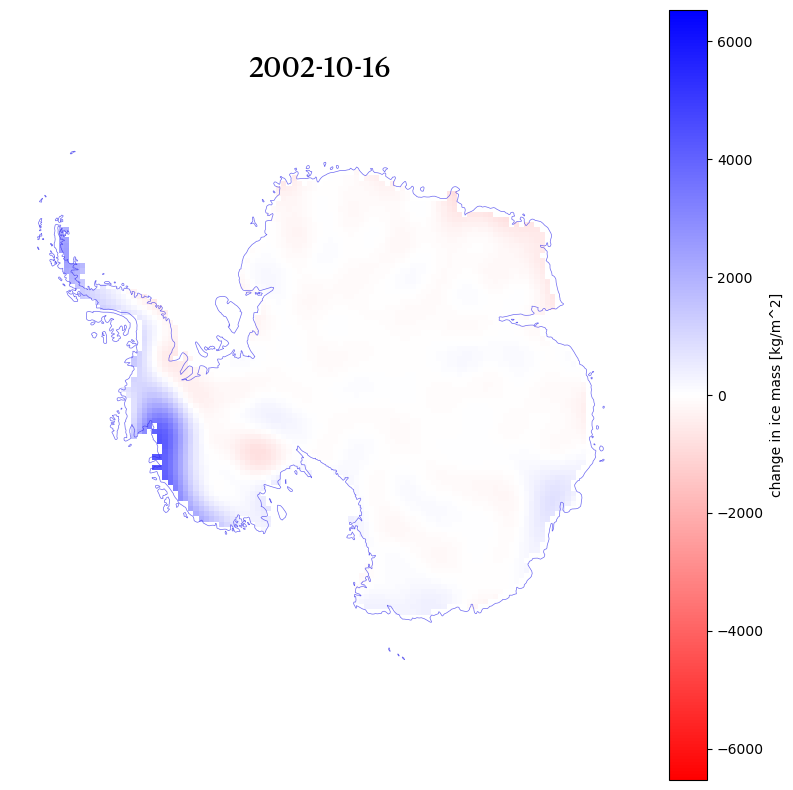

In [18]:
i = 4

fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection = ccrs.SouthPolarStereo())

# define bounds
ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

# hides boundry line
ax.axis('off')

special_color = '#2D27EB'

# thin coastline lines
ax.add_feature(cfeature.COASTLINE, 
               edgecolor = special_color, 
               linestyle = '-', 
               linewidth = 0.5, 
               alpha = 0.7)

gmb.dm[i].plot(ax = ax, 
        transform = ccrs.SouthPolarStereo(), 
        vmin = np.nanmin(gmb.dm.values), 
        # define max as negative min to keep 0 white
        vmax = -np.nanmin(gmb.dm.values),
        cmap = 'bwr_r') 

# specify font
fpath = Path(mpl.get_data_path(), "/home/kim/grace_convNP/fonts/HardingTextWebRegularRegular.ttf")

plt.title(str(gmb.dm[i].time)[36:46], font = fpath, size = 20)

plt.show()